In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>


Abstract: The data is collected from a smart small-scale steel industry in South Korea.

Data Set Information:

The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea. It produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.

Attribute Information:

*   Industry Energy Consumption Continuous kWh
*   Lagging Current reactive power Continuous kVarh (kilo-volt-ampere-reactive (kVAR)per hour)
*   Leading Current reactive power Continuous kVarh (kilo-volt-ampere-reactive (kVAR)per hour) 
*   Lagging Current power factor Continuous % 
*   Leading Current Power factor Continuous % 
*   Number of Seconds from midnight (NSM) Continuous S 
*   Week status Categorical (Weekend (0) or a Weekday(1))
*   Day of week Categorical Sunday, Monday â€¦. Saturday
*   Load Type Categorical Light Load, Medium Load, Maximum Load




In [5]:
# load data
df = pd.read_csv('Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


# General Information about Data Structure

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

# Data cleaning and imputation and handling duplication

In [9]:
#df.isnull().sum()
missing_val_df = pd.DataFrame().from_records([{'Column Name':col, 
                                               'Missing Values': len(df[df[col].isna()]), 
                                               'Missing Values (%)':np.round(len(df[df[col].isna()])/len(df), 4)*100}
                                              for col in df.columns])
print('Missing values before data cleaning')
missing_val_df

Missing values before data cleaning


,Column Name,Missing Values,Missing Values (%)
0,date,0,0.0
1,Usage_kWh,0,0.0
2,Lagging_Current_Reactive.Power_kVarh,0,0.0
3,Leading_Current_Reactive_Power_kVarh,0,0.0
4,CO2(tCO2),0,0.0
5,Lagging_Current_Power_Factor,0,0.0
6,Leading_Current_Power_Factor,0,0.0
7,NSM,0,0.0
8,WeekStatus,0,0.0
9,Day_of_week,0,0.0


In [16]:
#Check for Duplicate Values
df_duplicate=df[df.duplicated()]
if len(df_duplicate) > 0 :
    print("Below are the duplicate rows !!!")   
    df_duplicate
else :
    print("There are no duplicate rows !!!")    


There are no duplicate rows !!!


Dataset has no missing values or duplicate rows

# Statistical Summary

In [ ]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


Add the Shift Column into existing dataset, as the load can vary between day and night

In [97]:
df["Shift"]=df['date'].apply(lambda x : "Day" if pd.to_datetime(str(x)).time().hour >=7 and pd.to_datetime(str(x)).time().hour < 19 else "Night" )
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Shift
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,Night
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,Night
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,Night
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,Night
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,Night


In [98]:
df=df.drop(columns=['date'])
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Shift
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,Night
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,Night
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,Night
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,Night
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,Night


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
 10  Shift                                 35040 non-null  object 
dtypes: float64(6), 

1. After preprocessing, the data has 11 columns with 35040 rows
2. There are 7 columns with numeric data type and 4 columns with category data type.
3. The dataset does not have missing values ​​and duplicated rows

# Exploratory Data Analysis

Question :
1. What factors most influence the Type of Energy Load?
2. What Factor which triggered an energy load that is classified as a maximum load?
3. how effectively the energy load has been consumed?

Based on the available columns, it will be easier to analyze if the columns are categorized as follows:

1. Numerical contains columns with numeric data types only
2. Categorical contains columns with only categorical data types
3. Date provides a special datetime data type column

In [102]:
# Grouping columns based on column dtypes
df_num = df.select_dtypes(include=["int","float"])
df_catg = df.select_dtypes(exclude=["int","float","datetime"])
df_date= df.select_dtypes(include=["datetime"])

In [103]:
df_num.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


Insights:

1. Mean > 50% (Median) in Usage_kWh, Lagging_Current_Reactive.Power_kVarh, Leading_Current_Reactive_Power_kVarh, CO2(tCO2) indicates that these fields have a positive skewed distribution.
2. Mean < 50% (Median) in Lagging_Current_Power_Factor and Leading_Current_Power_Factor indicates that the column has a negative skewed distribution
3. Mean = 50% (Median) in NSM indicates that the column has a normal distribution

In [104]:
# showing the precise value counts
for col in df_catg:
  print(f"Value counts of {col} column")
  print(df_catg[col].value_counts(), '\n')

Value counts of WeekStatus column
Weekday    25056
Weekend     9984
Name: WeekStatus, dtype: int64 

Value counts of Day_of_week column
Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day_of_week, dtype: int64 

Value counts of Load_Type column
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64 

Value counts of Shift column
Night    17520
Day      17520
Name: Shift, dtype: int64 



Insights:

1. The date column does not have the same time, this data is measured every 15 minutes, so the date column has the same counts value as the number of all rows.
2. the Day_of_week column has a unique value of 7 according to the number of days in 1 week, with the value 'Monday' having the highest frequency of occurrence, namely 5088 rows
3. The Load_Type column only has 3 unique values, namely Light_Load, Medium_Load, and Maximum_Load, where these three values ​​describe the category of how much energy is expended every 15 minutes, in this column the value 'Light_Load' has the highest occurrence frequency, namely 18072 rows. So, judging from this value alone, we can conclude that the energy released every 15 minutes for a certain period of time is not too large, so companies don't need to worry about the budgetary funds used to pay for this energy load. But it doesn't stop there, because we want to learn more about this dataset.

## Univariate Analysis

BAR PLOT FOR TARGET COLUMN

% Energy Load Type are
 Light_Load      51.58
Medium_Load     27.67
Maximum_Load    20.75
Name: Load_Type, dtype: float64


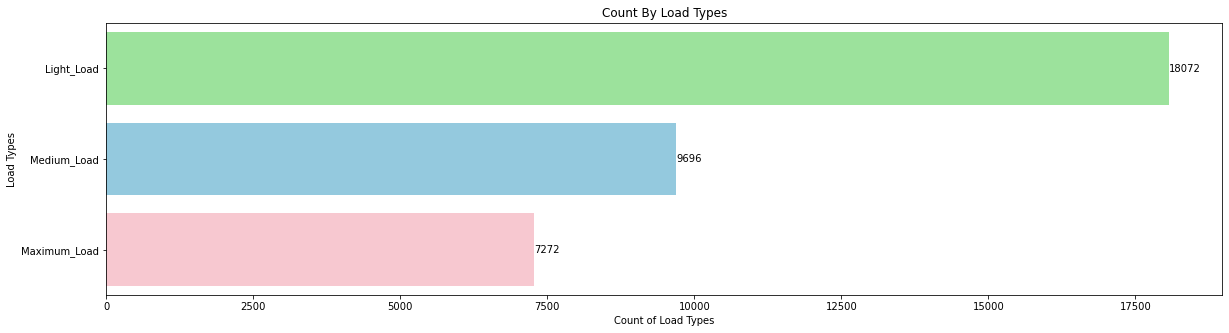

In [133]:
#Create a Bar Plot to see Energy Load
plt.figure(figsize=(20,5))
EnergyBar = sns.countplot(y="Load_Type", data=df, palette= {"Light_Load":'lightgreen' , "Medium_Load":'skyblue', "Maximum_Load":'Pink'})
for container in EnergyBar.containers:
    EnergyBar.bar_label(container)
EnergyBar.set(title='Count By Load Types',xlabel='Count of Load Types', ylabel='Load Types')    
print("% Energy Load Type are\n", round(df.Load_Type.value_counts() / df.Load_Type.count()*100,2))

Insights:

1. There are 51.58% Load_Type which is Light_Load. This means that more than 50% of energy use in this industry is categorized as light energy use. So there is no need to worry about whether the use of energy used by this industry is excessive or not.
2. 20.75% of this dataset is categorized as Maximum_Load. This usually happens when there is an unusual use of the production process in this industry or there are certain moments or times when the production process requires maximum energy.

BAR PLOT FOR CATEGORICAL COLUMN

Value % of WeekStatus column
Weekday    71.51
Weekend    28.49
Name: WeekStatus, dtype: float64 

Value % of Day_of_week column
Monday       14.52
Tuesday      14.25
Wednesday    14.25
Thursday     14.25
Friday       14.25
Saturday     14.25
Sunday       14.25
Name: Day_of_week, dtype: float64 

Value % of Load_Type column
Light_Load      51.58
Medium_Load     27.67
Maximum_Load    20.75
Name: Load_Type, dtype: float64 

Value % of Shift column
Night    50.0
Day      50.0
Name: Shift, dtype: float64 



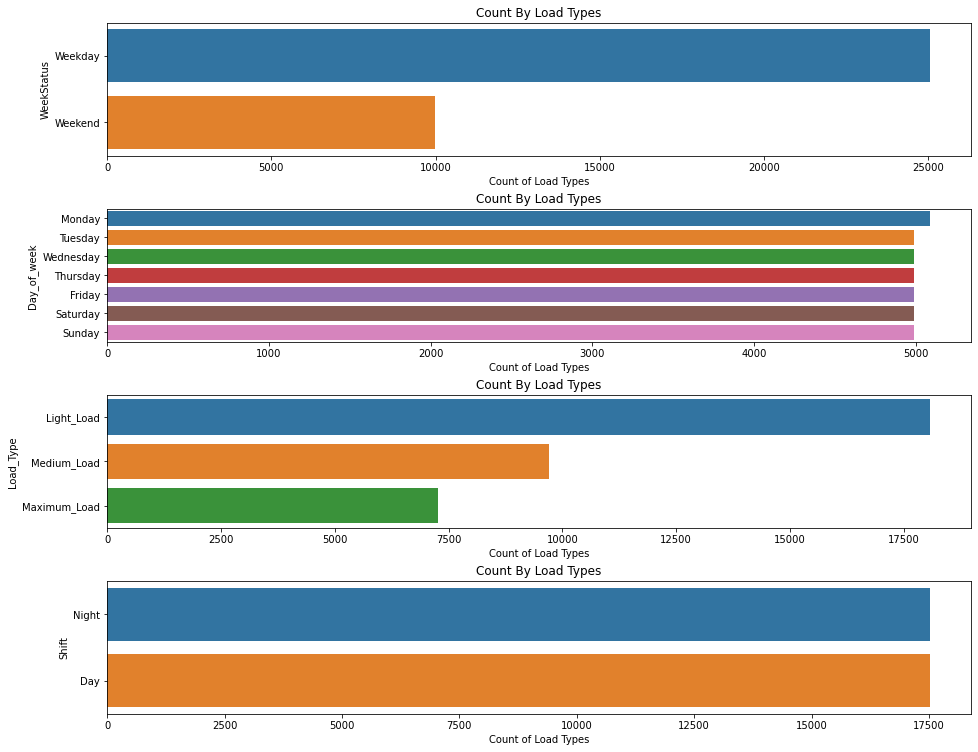

In [144]:
#Displays Percentage for Categorical data
for col in df_catg:
  print(f"Value % of {col} column")
  print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Membuat Bar Plot untuk Categorical  data
plt.figure(figsize=(15,12))
plt.subplots_adjust(left=0.1,
                    bottom=0.5,
                    right=0.1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i,col in enumerate(df_catg):    
    plt.subplot(4,1,i + 1)
    ax = sns.countplot(data = df, y = col).set(title='Count By Load Types',xlabel='Count of Load Types', ylabel=col)  
    

Insights:

It can be seen from the bar above, Monday has the highest percentage, namely 14.52%, even though it is only a difference of 0.27%, but the percentage of energy use for each day can be said to be the same, namely in the range of 14%.

KDE PLOT

In [19]:
feat_num = list(df_num)
feat_num

['Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM']

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

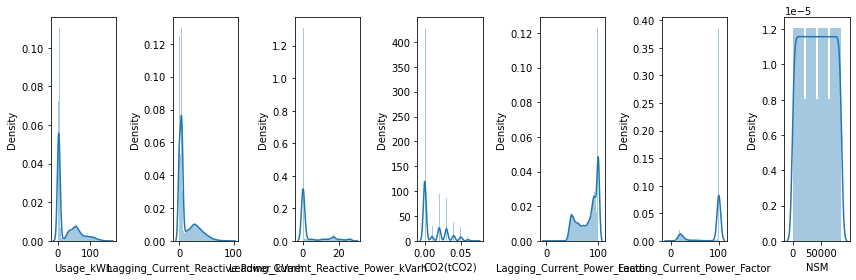

In [22]:
#Membuat KDE Plot
plt.figure(figsize=(12,4))

features = feat_num
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

Insights:

1. Seen from Usage_kWh, Lagging_Current_Reactive.Power_kVarh, Leading_Current_Reactive_Power_kVarh, and CO2(tCO2), their values are dominated by low scores.
2. The Lagging_Current_Power_Factor and Leading_Current_Power_Factor are dominated by high values.
3. NSM is the only column that has a normal distribution

## Bivariate / Multivariate Analysis

### Seeing Load_Type's Relationship with Categorical data

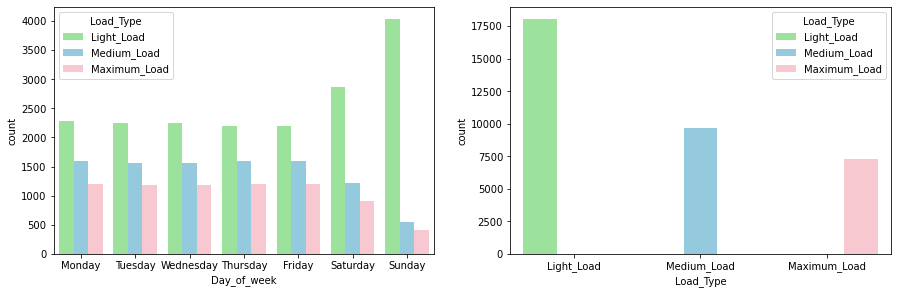

In [23]:
#Melihat Hubungan Load_Type dengan data Categorical
plt.figure(figsize=(15,10))

for i,col in enumerate(df_catg):    
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "Load_Type", palette= {"Light_Load":'lightgreen' , "Medium_Load":'skyblue', "Maximum_Load":'Pink'})

Insights:

1. Energy usage that Light_load increases with increasing days (approaching Sunday). This means that the use of energy in a week, less and less every day.
2. For Medium and Maximum Load_Type, the closer to Sunday the lower it is.
3. Sunday is the day with the lightest energy usage, because Medium and Maximum Load have a low amount while Light_Load has a large amount, so it can be said that Sunday is the day with the lowest energy usage compared to other days.
4. This might happen because on Saturdays and Sundays the company has holidays so some production is stopped due to holidays or weekends.

### Seeing Load_Type Relationship with Numerical data

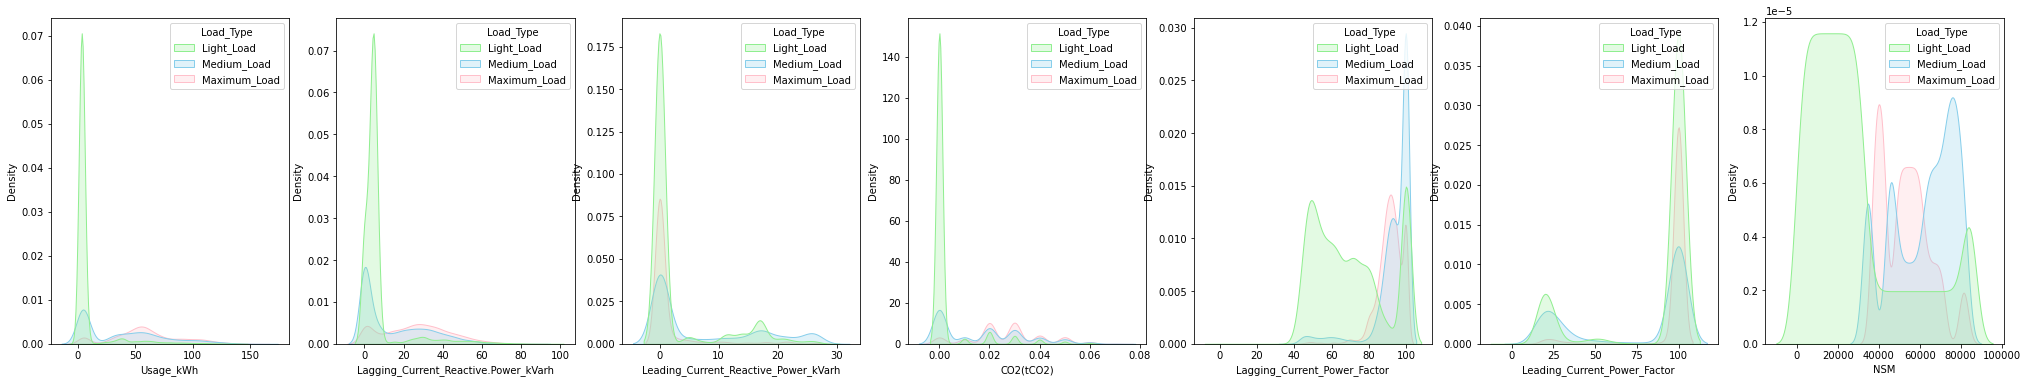

In [25]:
#Seeing Load_Type Relationship with Numerical data
plt.figure(figsize=(35,6))

for i,col in enumerate(df_num):    
    plt.subplot(1,7,i + 1)
    ax = sns.kdeplot(x=col, hue="Load_Type", data=df, shade=True,palette= {"Light_Load":'lightgreen' , "Medium_Load":'skyblue', "Maximum_Load":'Pink'})

<AxesSubplot:xlabel='Load_Type', ylabel='NSM'>

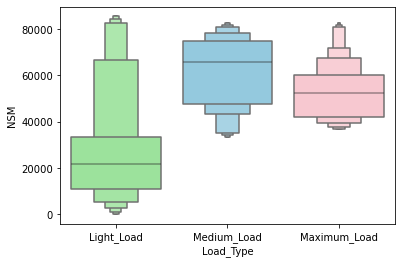

In [26]:
#View the NSM's relationship with the target column
sns.boxenplot(x=df["Load_Type"] , y = df["NSM"] ,palette= {"Light_Load":'lightgreen' , "Medium_Load":'skyblue', "Maximum_Load":'Pink'})

### View NSM relationships by day with the target column

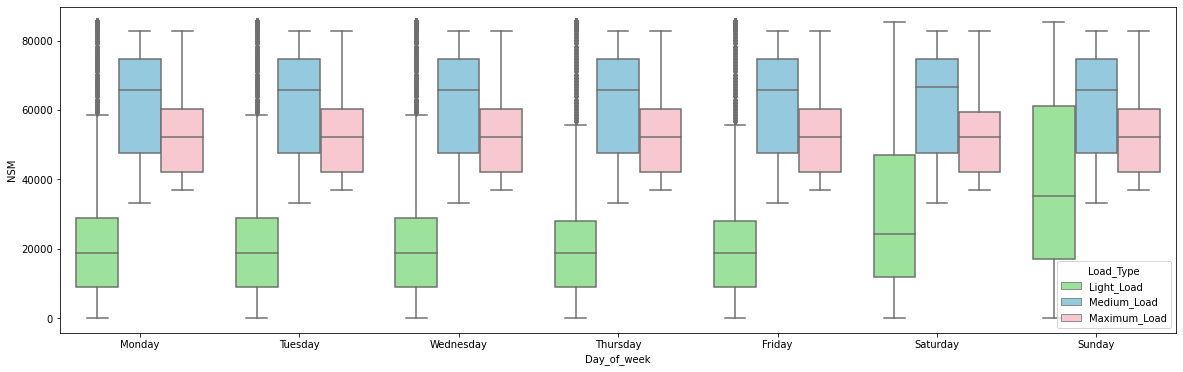

In [27]:
#View NSM relationships by day with the target column
plt.figure(figsize=(20,6))
sns.boxplot(x= df['Day_of_week'] , y= df['NSM'] ,hue= df["Load_Type"], palette= {"Light_Load":'lightgreen' , "Medium_Load":'skyblue', "Maximum_Load":'Pink'})
plt.show()

### INSIGHT

1. Seen from Usage_kWh, Lagging_Current_Reactive.Power_kVarh, Leading_Current_Reactive_Power_kVarh and CO2(tCO2), when the value is low then Light Load tends to be more than other Load Types. But when it hits a value in the range of 0, Light Load has the least percentage among the others. When it hits a certain value (depending on each factor), Maximum Load has the most percentage among the other Load Types except for Leading_Current_Reactive_Power_kVarh. In Leading_Current_Reactive_Power_kVarh, when the value is > 10, Light Load still dominates, but when the value is > 20, Medium Load is the most dominant among the others. So, the greater the value of these four factors, the greater the energy burden or energy use.

2. When Lagging_Current_Power_Factor has a low value (range > 40 mA), Light Load seems to dominate compared to other Load Types. However, when it hits a value in the range of 90 mA, the situation changes drastically where Light Load has the smallest percentage among the other Load Types, while Maximum Load leads in that number. When the value is in the range of 100, Medium Load dominates the others. So that it can still be said that the bigger the energy load or energy use, but not to the maximum.

3. For Leading_Current_Power_Factor, it can be seen that Light Load always dominates at any value. So you could say that the greater the Leading_Current_Power_Factor value, the smaller the energy load or usage, because when the Leading_Current_Power_Factor value is greater, the percentage of the Light Load becomes the largest percentage among the other Load Types.

4. In NSM it can be seen that the greater the value, the smaller the percentage of Light Load, although at certain values ​​it seems to be rising again, but graphically you can say it is decreasing. At values ​​> 25000, Medium and Maximum Load seem to dominate. However, the greater the NSM value, the greater the Medium Load percentage. So it can be concluded that the greater the NSM value, the greater the energy burden on energy use data, but not to the maximum limit.

### Pair Plot

<Figure size 792x648 with 0 Axes>

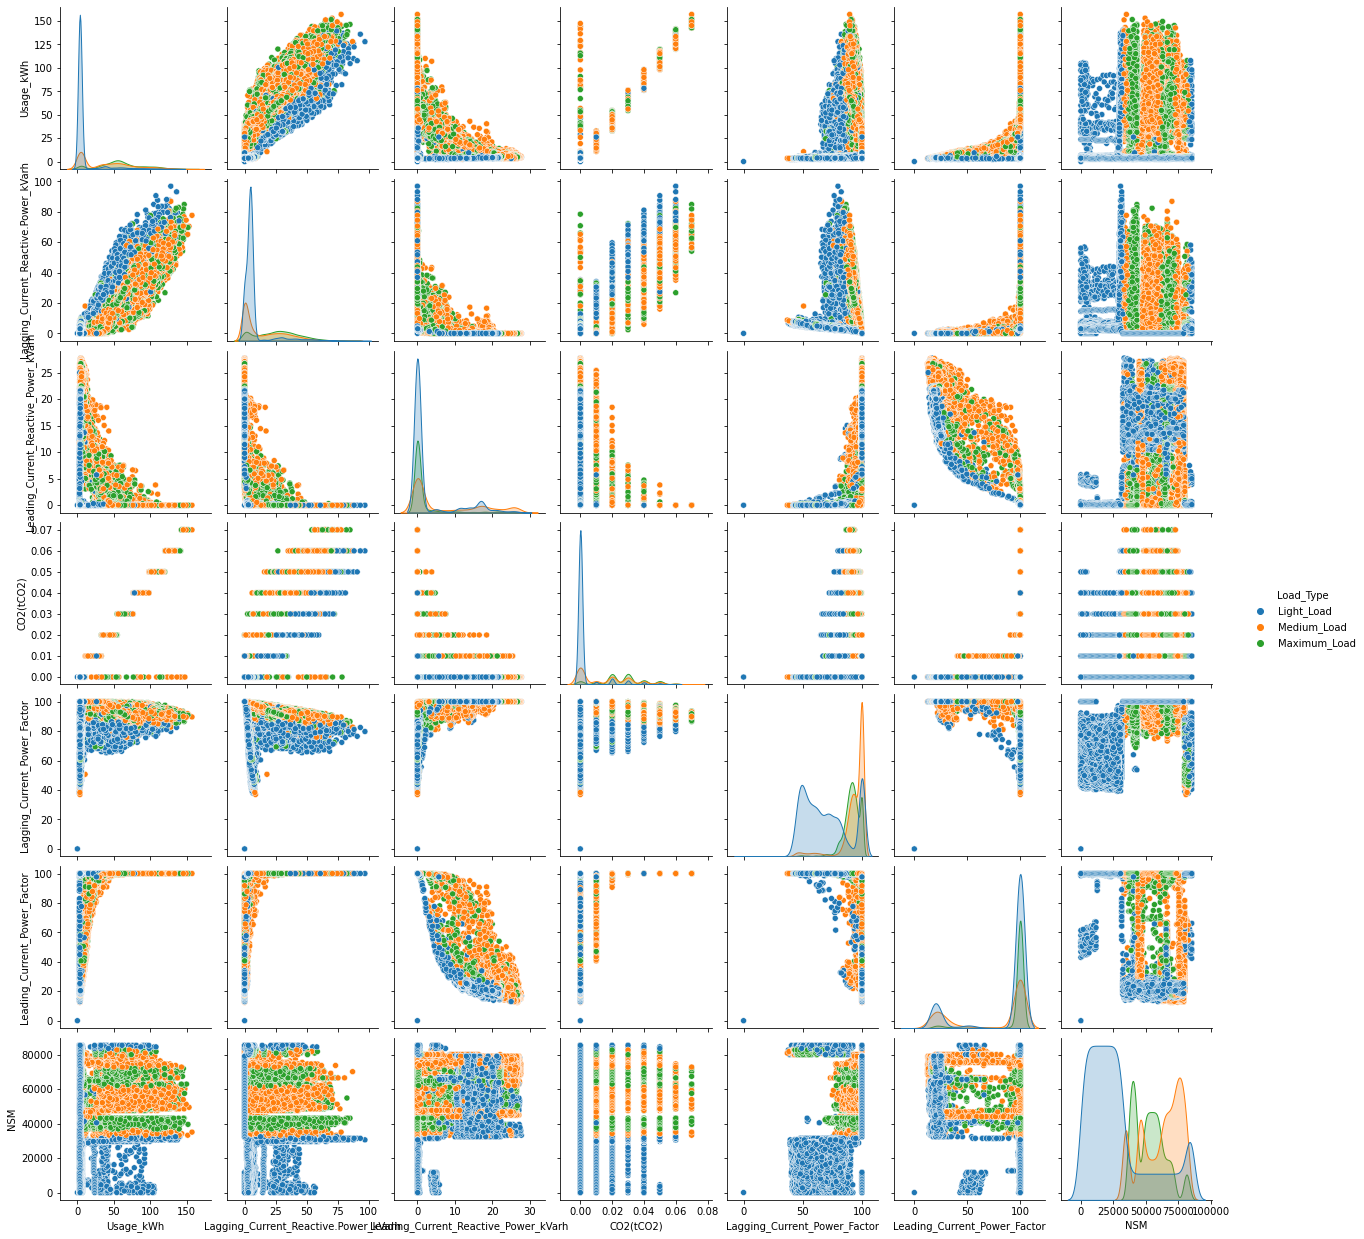

In [28]:
#Create a Pair Plot Graph
plt.figure(figsize=(11,9))
sns.pairplot(df,hue = 'Load_Type')
plt.show()

###Insight:

1. The relationship between Usage_kWh and Lagging_Current_Reactive.Power_kVarh is quite linear, the higher the kWh usage, the higher the Lagging_Current_Reactive.Power_kVarh
2. Usage_kWh and Leading_Current_Reactive_Power_kVarh are quite linear down, the higher the kWh usage, the lower the Leading_Current_Reactive_Power_kVarh value
3. Usage_kWh and CO2 also look quite linear, but when the CO2 level is at the minimum value, the usage kWh has an even distribution of values ​​(from minimum to maximum it is at one constant value of CO2 levels).
4. In Usage_kWh and Lagging_Current_Power_Factor there is a point where it is the point with the minimum value of the two variables. The relationship between these two variables is quite linear, where at a certain point the Lagging_Current_Power_Factor value shows the higher the Lagging_Current_Power_Factor value, the higher the usage_kWh value.
5. Usage_kWh and Leading_Current_Power_Factor look quite linear, but when the maximum value of Leading_Current_Power_Factor is, the value of usage_kWh is evenly distributed (from minimum to maximum it is one constant value of Leading_Current_Power_Factor), the higher the Leading_Current_Power_Factor value, the higher the usage kWh value.
6. Usage_kWh and NSM have a fairly linear upward graph, but when NSM reaches its maximum value, usage_kWh becomes lower than before.
7. The relationship of Lagging_Current_Reactive.Power_kVarh with other variables is almost the same as the relationship of usage_kWh above, which differs only in the NSM variable. The difference is that the data distribution is not very linear, but it is still the same as the usage_kWh above, when a certain Lagging_Current_Reactive.Power_kVarh value and the value is higher, the usage_kWh value is actually lower.
8. The relationship between Leading_Current_Reactive_Power_kVarh and CO2 seems quite linear downward, the higher the CO2 level, the lower the Leading_Current_Reactive_Power_kVarh value.
9. Leading_Current_Reactive_Power_kVarh with Lagging_Current_Power_Factor looks also quite linear up, the higher the value of Leading_Current_Reactive_Power_kVarhmaki the higher the value of Lagging_Current_Power_Factor.
10. For Leading_Current_Reactive_Power_kVarh with Leading_Current_Power_Factor, the graph shows a downward linear trend where the higher the Leading_Current_Power_Factor value, the lower the Leading_Current_Reactive_Power_kVarh value.
11. In Leading_Current_Reactive_Power_kVarh and NSM, it can be seen that in certain values ​​of NSM, the distribution of Leading_Current_Reactive_Power_kVarh data tends to be stable, meaning that when the NSM value is higher, the Leading_Current_Reactive_Power_kVarh value is evenly distributed (from minimum to maximum)
12. Leading_Current_Power_Factor with CO2 looks like a linear upward graph, but when the Leading_Current_Power_Factor value is at its maximum, the distribution of data/CO2 levels is evenly distributed (there is a minimum to a maximum value)
13. CO2 and NSM have a similar relationship with Usage kWH and NSM, but the correlation between CO2 and NSM levels shows that the data is more tenuous.
14. The relationship between CO2 levels and Lagging_Current_Power_Factor graphically looks linear upwards, the higher the CO2 level, the higher the Lagging_Current_Power_Factor value
15. It can be seen in the graph that when the Lagging_Current_Power_Factor value is maximum, the Leading_Current_Power_Factor value also reaches the maximum
16. When the NSM value is minimum to maximum, there is a maximum Lagging_Current_Power_Factor value at each point of the NSM value.
17. Just like the NSM relationship with Lagging_Current_Power_Factor, the NSM relationship with Leading_Current_Power_Factor also has a maximum value of Leading_Current_Power_Factor at each point of the NSM value.

### Looking for what factors trigger the maximum load

In [29]:
df_max=df[df['Load_Type']=='Maximum_Load']
df_light=df[df['Load_Type']=='Light_Load']
df_med=df[df['Load_Type']=='Medium_Load']


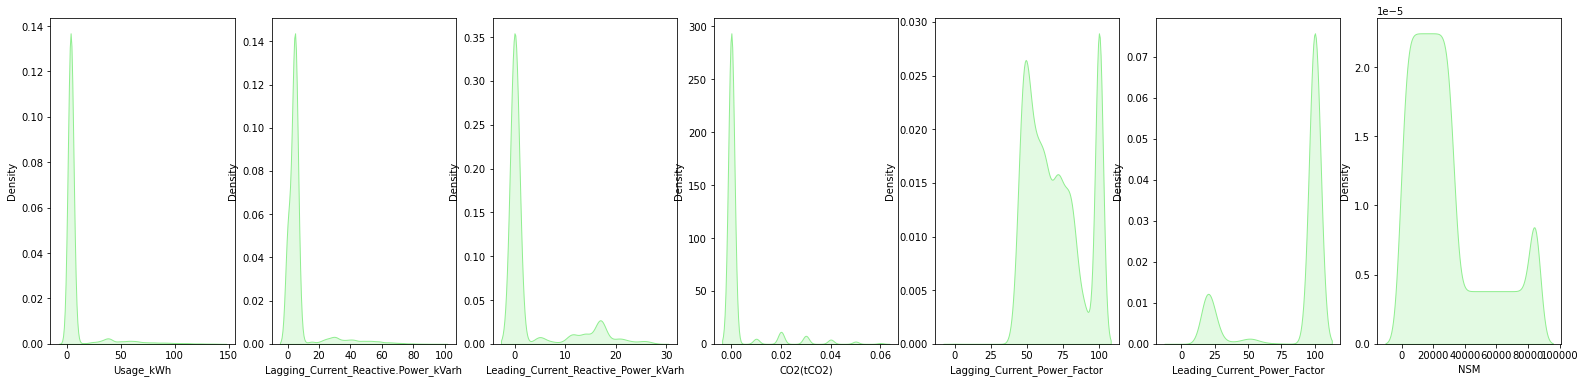

In [ ]:
plt.figure(figsize=(35,6))

for i,col in enumerate(df_num):    
    plt.subplot(1,9,i + 1)
    ax = sns.kdeplot(x=col,data=df_light, shade=True,color='lightgreen')

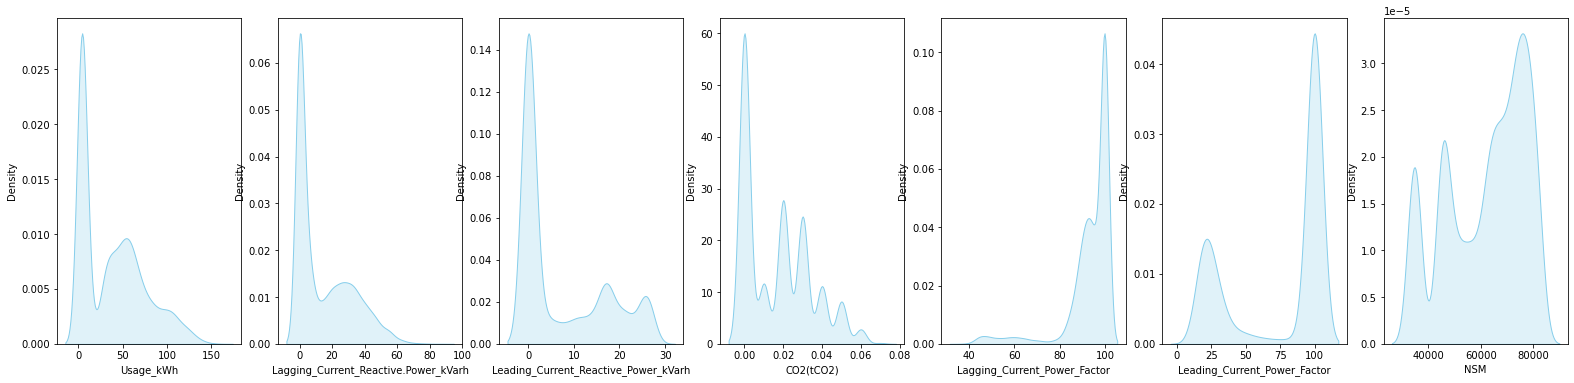

In [30]:
plt.figure(figsize=(35,6))

for i,col in enumerate(df_num):    
    plt.subplot(1,9,i + 1)
    ax = sns.kdeplot(x=col,data=df_med, shade=True,color='skyblue')

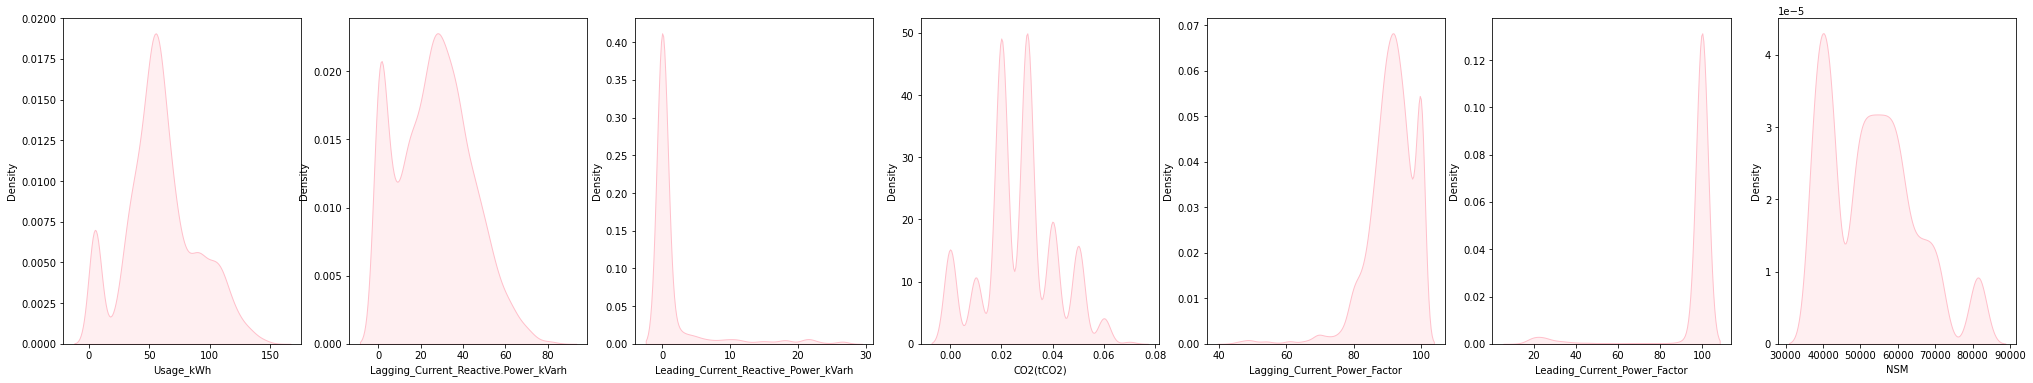

In [31]:
plt.figure(figsize=(35,6))

for i,col in enumerate(df_num):    
    plt.subplot(1,7,i + 1)
    ax = sns.kdeplot(x=col,data=df_max, shade=True, color='Pink')

Insight:

Seen from the three graphs above, usage_kWh, Lagging_Current_Reactive.Power_kVarh and CO2, have a tendency to increase at maximum load. It can be seen that these 3 factors have a fairly high graph on the maximum load

In [32]:
#analyze of energy consumption and NSM based on load type, day of week
pd.pivot_table(df, index = ['Load_Type', 'Day_of_week'], values = ['NSM', 'Usage_kWh'], 
               aggfunc = {'NSM' : np.mean, 'Usage_kWh' : np.mean}).sort_values(by=['NSM', 'Usage_kWh'],ascending=False)

NSM  Usage_kWh
Load_Type    Day_of_week                         
Medium_Load  Saturday     62218.421053  17.547648
             Sunday       61967.647059  16.368934
             Thursday     61758.000000  44.986200
             Monday       61758.000000  43.097231
             Friday       61758.000000  42.220494
             Tuesday      61705.102041  45.020797
             Wednesday    61705.102041  40.462379
Maximum_Load Tuesday      53176.530612  66.023359
             Wednesday    53176.530612  62.358359
             Monday       53106.000000  66.278233
             Thursday     53106.000000  64.522758
             Friday       53106.000000  61.043700
             Sunday       52826.470588  29.195662
             Saturday     52492.105263  41.529605
Light_Load   Sunday       39144.653465   4.171106
             Saturday     31381.843575   7.072210
             Wednesday    24074.199288  10.780560
             Tuesday      24074.199288  10.510040
             Monday       24026.223776   8.805459
             Thursday     23206.204380  11.803964
             Friday       23206.204380  11.361442

In [33]:
df.groupby(['Load_Type']).agg(['mean','median'])

C:\Users\sunil\AppData\Local\Temp\ipykernel_16912\1976102455.py:1: FutureWarning: ['Day_of_week'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(['Load_Type']).agg(['mean','median'])


Usage_kWh         Lagging_Current_Reactive.Power_kVarh         \
                   mean  median                                 mean median   
Load_Type                                                                     
Light_Load     8.626207   3.310                             7.004266   4.46   
Maximum_Load  59.265314  56.630                            26.190308  26.46   
Medium_Load   38.445394  34.435                            14.410357   5.65   

             Leading_Current_Reactive_Power_kVarh        CO2(tCO2)         \
                                             mean median      mean median   
Load_Type                                                                   
Light_Load                               2.944328   0.00  0.002554   0.00   
Maximum_Load                             1.618524   0.00  0.026899   0.03   
Medium_Load                              7.287360   0.25  0.016713   0.02   

             Lagging_Current_Power_Factor          \
                                     mean  median   
Load_Type                                           
Light_Load                      69.679545  66.270   
Maximum_Load                    91.013417  91.710   
Medium_Load                     93.064849  96.815   

             Leading_Current_Power_Factor                  NSM           
                                     mean median          mean   median  
Load_Type                                                                
Light_Load                      85.409154  100.0  28384.661355  21600.0  
Maximum_Load                    95.725678  100.0  53036.138614  52200.0  
Medium_Load                     73.908705  100.0  61810.396040  65700.0

## CONCLUSION

**CONCLUSION**

1. Based on the analysis and graph above, NSM is the most influential factor on energy load.
2. Usage_kWh, Lagging_Current_Reactive.Power_kVarh and CO2 trigger energy load which is classified as maximum load
3. The closer the sunday / weekend, the lighter the energy load

# Permodelan - SHAP Feature Importance

## Handling Outliers

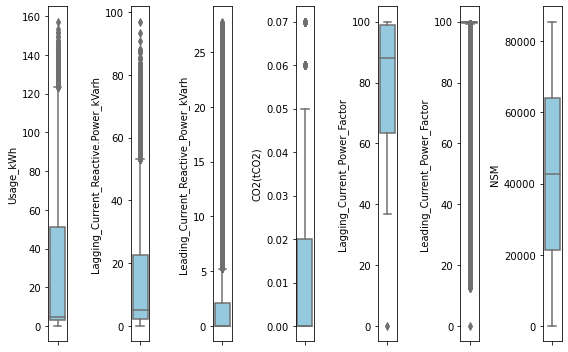

In [34]:
plt.figure(figsize=(8, 5))
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df[feat_num[i]],color='skyblue',orient='v')
    plt.tight_layout()

In [35]:
df['Usage_kWh'] = np.log10(df['Usage_kWh'] + 1)
df['Lagging_Current_Reactive.Power_kVarh'] = np.log10(df['Lagging_Current_Reactive.Power_kVarh'] + 1)
df['Leading_Current_Reactive_Power_kVarh'] = np.log10(df['Leading_Current_Reactive_Power_kVarh'] + 1)


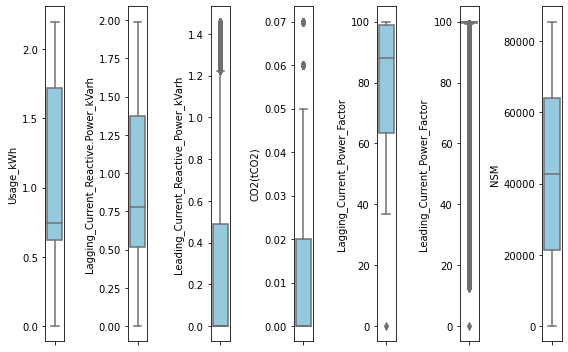

In [36]:
plt.figure(figsize=(8, 5))
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df[feat_num[i]],color='skyblue',orient='v')
    plt.tight_layout()
    

## Handling Categorical Data

In [37]:
map_class = {'Maximum_Load':2,
             'Medium_Load':1,
             'Light_Load':0}
df['loadType_cat'] = df['Load_Type'].map(map_class)
df[['Load_Type','loadType_cat']].head()

,Load_Type,loadType_cat
0,Light_Load,0
1,Light_Load,0
2,Light_Load,0
3,Light_Load,0
4,Light_Load,0


In [38]:
df=df.drop(columns='Load_Type')
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,loadType_cat
0,0.620136,0.596597,0.0,0.0,73.21,100.0,900,Monday,0
1,0.698970,0.737193,0.0,0.0,66.77,100.0,1800,Monday,0
2,0.627366,0.631444,0.0,0.0,70.28,100.0,2700,Monday,0
3,0.634477,0.658965,0.0,0.0,68.09,100.0,3600,Monday,0
4,0.683047,0.740363,0.0,0.0,64.72,100.0,4500,Monday,0


In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Day_of_week'])
df['Day_of_week_label_encoding'] = le.transform(df['Day_of_week']) 
Day_Label_Encoding = df[['Day_of_week','Day_of_week_label_encoding',]]
Day_Label_Encoding.head()

,Day_of_week,Day_of_week_label_encoding
0,Monday,1
1,Monday,1
2,Monday,1
3,Monday,1
4,Monday,1


In [40]:
Day_Label_Encoding.value_counts()

Day_of_week  Day_of_week_label_encoding
Monday       1                             5088
Friday       0                             4992
Saturday     2                             4992
Sunday       3                             4992
Thursday     4                             4992
Tuesday      5                             4992
Wednesday    6                             4992
dtype: int64

In [41]:
df=df.drop(columns=['Day_of_week'])
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,loadType_cat,Day_of_week_label_encoding
0,0.620136,0.596597,0.0,0.0,73.21,100.0,900,0,1
1,0.698970,0.737193,0.0,0.0,66.77,100.0,1800,0,1
2,0.627366,0.631444,0.0,0.0,70.28,100.0,2700,0,1
3,0.634477,0.658965,0.0,0.0,68.09,100.0,3600,0,1
4,0.683047,0.740363,0.0,0.0,64.72,100.0,4500,0,1


In [42]:
df_num=df[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh',	'CO2(tCO2)','Lagging_Current_Power_Factor',	'Leading_Current_Power_Factor',	'NSM']]
categoricalFeatures = df[['Day_of_week_label_encoding']]
target = df[['loadType_cat']]

In [43]:
df['loadType_cat'].value_counts()

0    18072
1     9696
2     7272
Name: loadType_cat, dtype: int64

Data Imbalance

In [44]:
df_num.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,0.620136,0.596597,0.0,0.0,73.21,100.0,900
1,0.698970,0.737193,0.0,0.0,66.77,100.0,1800
2,0.627366,0.631444,0.0,0.0,70.28,100.0,2700
3,0.634477,0.658965,0.0,0.0,68.09,100.0,3600
4,0.683047,0.740363,0.0,0.0,64.72,100.0,4500


## Split Data

In [45]:
X = pd.concat([categoricalFeatures, df_num],axis=1)
y = target[['loadType_cat']]
X.head()

,Day_of_week_label_encoding,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,1,0.620136,0.596597,0.0,0.0,73.21,100.0,900
1,1,0.698970,0.737193,0.0,0.0,66.77,100.0,1800
2,1,0.627366,0.631444,0.0,0.0,70.28,100.0,2700
3,1,0.634477,0.658965,0.0,0.0,68.09,100.0,3600
4,1,0.683047,0.740363,0.0,0.0,64.72,100.0,4500


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28032, 8), (7008, 8), (28032, 1), (7008, 1))

In [47]:
from sklearn.preprocessing import StandardScaler

to_scale = ['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']

scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])

## SMOTE

In [48]:
from imblearn import under_sampling, over_sampling

X = df.drop(['loadType_cat'],axis = 1)
y = df['loadType_cat']

# Overampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

sm = over_sampling.SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100


ModuleNotFoundError: No module named 'imblearn'

### SHAP Feature

Linear models can use their coefficients as a metric for the overall importance of each feature, but they are scaled to the scale of the variable itself, which can lead to distortion and misinterpretation. Also, the coefficients cannot explain the importance of local features, and how they change with lower or higher values. The same can be said for the benefit of tree-based model features, and this is why SHAP is useful for model interpretation. One example is considering a cooperative game with the same number of players as the feature name. SHAP will reveal the individual contribution of each player (or feature) to the model output, for each example or observation.

In [49]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [50]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [51]:
model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001)
# Fit the Model using XGBRegressor
model.fit(X, y)

NameError: name 'XGBRegressor' is not defined

In [ ]:
# load JS visualization code to notebook
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

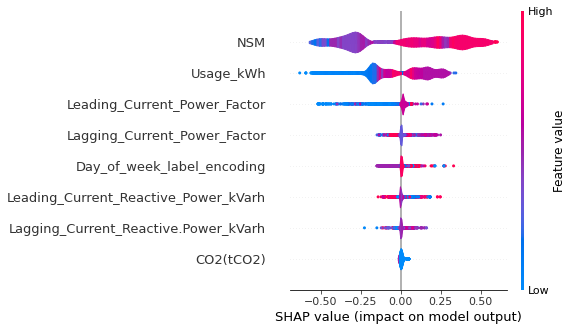

In [ ]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='violin')

Sumbu X memiliki nilai target yaitu klasifikasi load type. x adalah observasi yang dipilih, f(x) adalah nilai prediksi model, dengan input x dan E[f(x)] yang merupakan nilai ekspektasi dari variabel target atau dengan kata lain mean dari semua prediksi, Nilai SHAP absolut menunjukkan kepada kita seberapa besar satu fitur memengaruhi prediksi, jadi NSM paling besar, Usage_kWh yang kedua, Usage kWh yang ketiga, dan CO2 adalah fitur dengan kontribusi terendah untuk prediksi.

The X axis has a target value, namely the load type classification. x is the selected observation, f(x) is the predicted value of the model, with input x and E[f(x)] which is the expected value of the target variable or in other words the mean of all predictions, the absolute SHAP value shows us how much one feature affects prediction, so NSM is largest, Usage_kWh is second, Usage kWh is third, and CO2 is the feature with the lowest contribution to prediction.

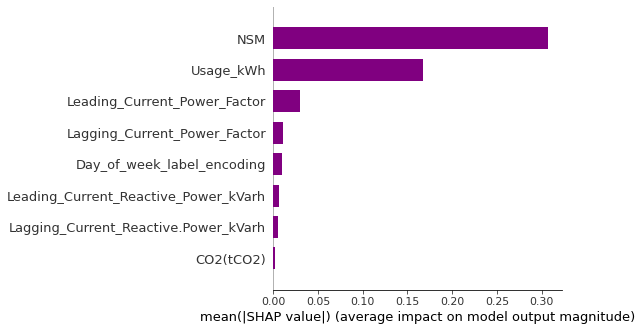

In [ ]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar', color='purple')

Pada plot di atas fitur-fitur diurutkan dari yang tertinggi ke efek terendah pada prediksi. Hal ini memperhitungkan nilai SHAP absolute, sehingga tidak masalah jika fitur tersebut memengaruhi prediksi secara positif atau negatif.

In the plot above the features are ordered from highest to lowest effect on prediction. This takes into account absolute SHAP values, so it doesn't matter if the feature positively or negatively affects the prediction.

In [ ]:
shap.initjs()
i = 4
shap.force_plot(explainer.expected_value, shap_values[i], features=X.iloc[i], feature_names=X.columns)

Force Plot adalah cara lain untuk melihat efek setiap fitur pada prediksi, untuk pengamatan tertentu. Dalam plot ini nilai SHAP positif ditampilkan di sisi kiri dan negatif di sisi kanan, seolah-olah bersaing satu sama lain. Nilai yang disorot adalah prediksi untuk pengamatan itu.

Force Plots are another way to see the effect each feature has on the prediction, for a given observation. In this plot positive SHAP values are shown on the left and negative on the right, as if they were in competition with each other. The highlighted value is the prediction for that observation.

# CONCLUSION

1. Based on the EDA that has been done, **NSM is the most influential factor on energy load**. This is also confirmed using modeling with the SHAP Feature Importance method where this method will provide a SHAP (SHapley Additive ExPlanations) value which is based on cooperative game theory and is used to increase transparency and interpretation of machine learning models. From the 3 summary plots above, all of them show the same thing, so the conclusions from the modeling are considered the same as the conclusions from the EDA that has been done.

2. Usage_kWh, Lagging_Current_Reactive.Power_kVarh and CO2 are factors that trigger energy load which is classified as maximum load. it can be seen from the graph which is divided into 3 parts based on energy load, the three factors have a graph that increases significantly when the energy load is classified as Maximum Load.

3. The closer to the weekend, the lighter the energy load. It can be seen from the plot that has been made, as the weekend approaches which are Saturday and Sunday, the light load increases while the medium and maximum loads decrease, so it can be concluded that on weekends, energy consumption is not as much as during weekdays.

4. When viewed from the energy load distribution plot, it can be seen that the light load has the highest number among the others. So, it can be said that energy consumption for 2018 is still considered effective.